# TinyML - Principal Component Analysis

In [1]:
#!pip install micromlgen
#!pip install factor_analyzer

## 1. Importing libraries

In [2]:
from micromlgen import port
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

## 2. Load Dataset

Decathlon

A database with 41 rows and 13 columns: the first ten columns correspond to the athletes' performances in the 10 decathlon events. Columns 11 and 12 correspond respectively to the classification and the points obtained. The last column is a categorical variable corresponding to the sporting event (2004 Olympic Games or 2004 Decathlon).

The variables are

- 100m (100 meter dash),
- long.jump (long jump),
- shot.put (weight throw),
- High.jump (high jump),
- 400m (400 meters),
- 110m.hurdle (110 meter hurdles),
- Discus (discus throw),
- Pole.vault (pole vault),
- Javeline (javelin throw),
- 1500m (1500 meters).


Fonte: https://malouche.github.io/data_in_class/decathlon_data.html

In [3]:
patch = './data/decathlon.csv'
df = pd.read_csv(patch, index_col=0)

In [4]:
df.head(5)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [5]:
df.columns

Index(['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle',
       'Discus', 'Pole.vault', 'Javeline', '1500m', 'Rank', 'Points',
       'Competition'],
      dtype='object')

## 3. Dataset Visualization 

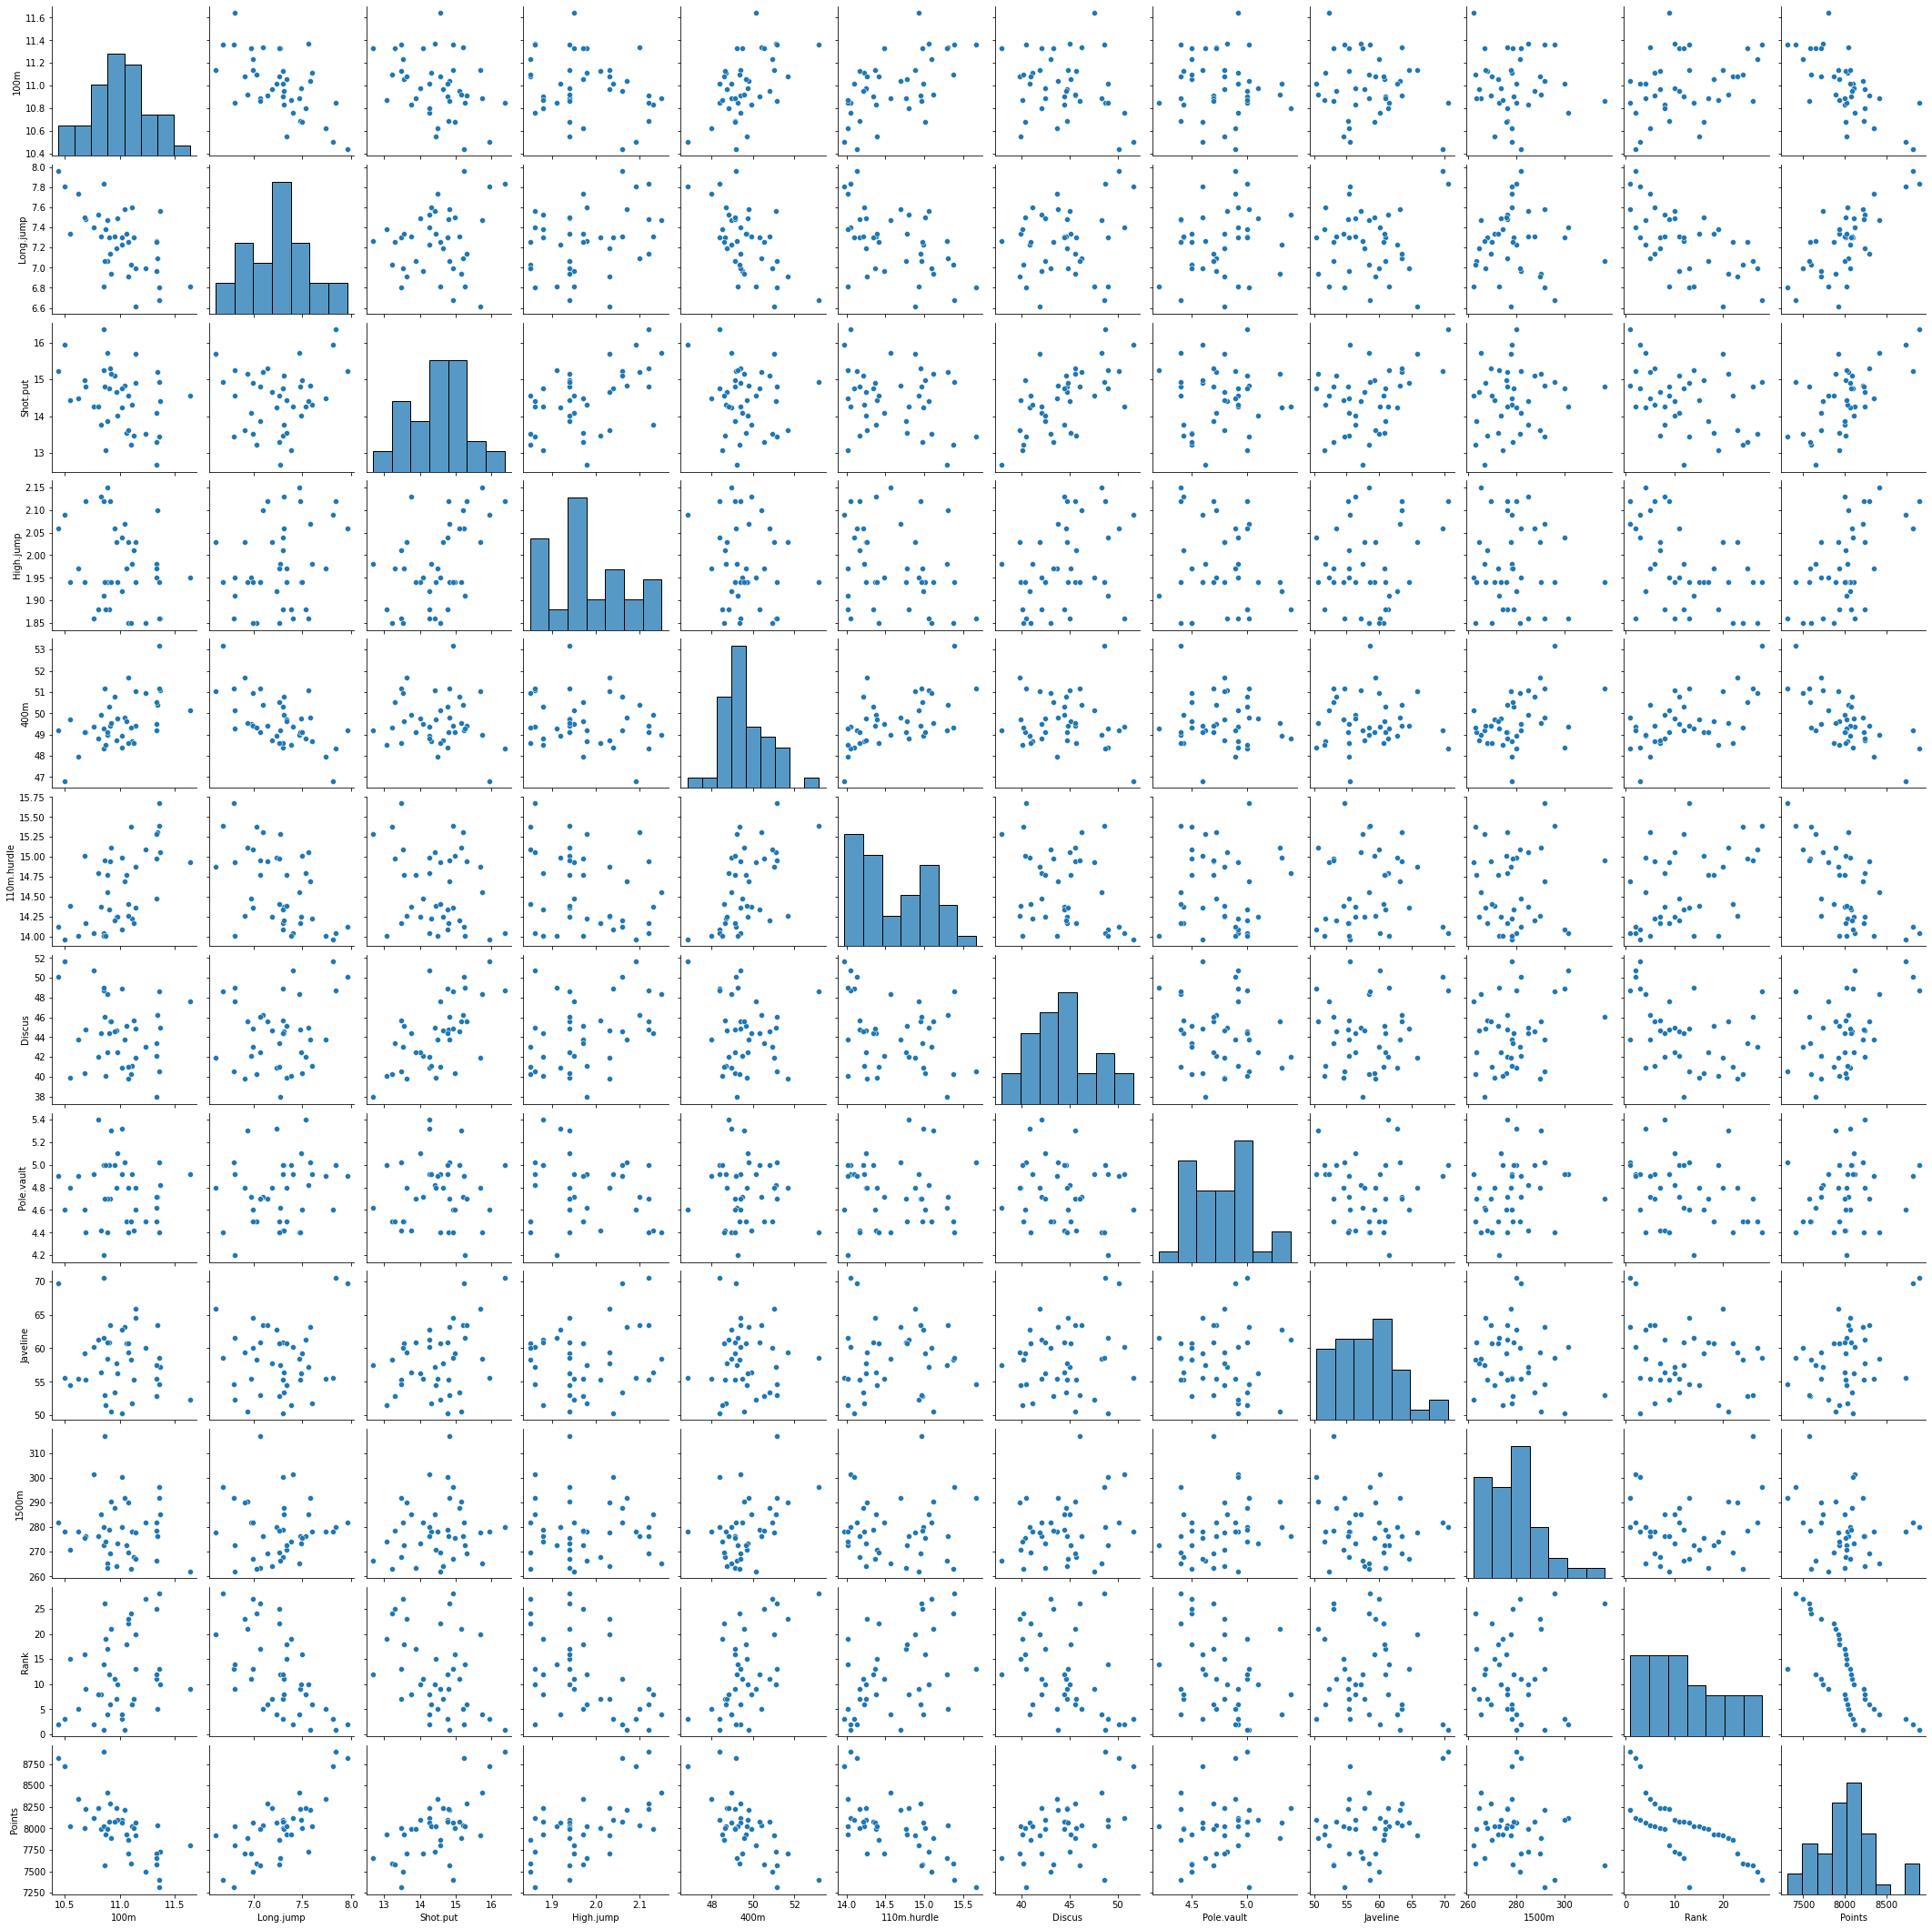

In [6]:
sns.pairplot(df)

## 4. Standardize the data

In [7]:
columns_selected = ['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle',
       'Discus', 'Pole.vault', 'Javeline']

In [8]:
X = df[columns_selected]

In [9]:
X

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19


In [10]:
X_standardized = StandardScaler().fit_transform(X)

In [11]:
df_X_standardized = pd.DataFrame(X_standardized, columns=columns_selected)

## 5. Analyze the correlation matrix of the data

### 5.1 Correlation matrix

In [12]:
corr = X.corr()
corr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232
110m.hurdle,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743
Discus,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890
Pole.vault,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001
Javeline,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000


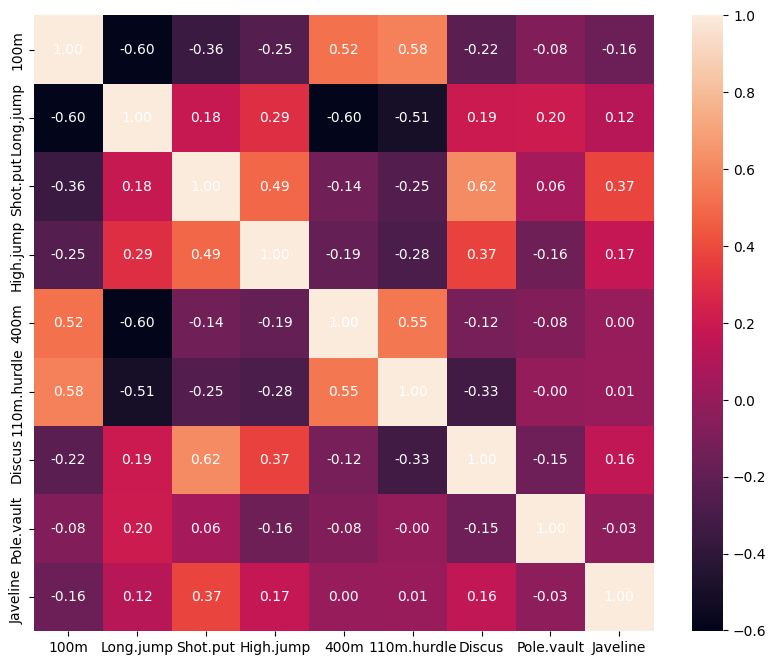

In [13]:
# Adjusting the size of the figure
plt.figure(figsize=(10, 8))

# Your existing code for generating the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Adding values to the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='w')

# Display the heatmap
plt.show()

### 5.2 Eigenvalues and  Eigenvectors

In [14]:
X = np.matrix(X)
cov_matrix =  np.cov(np.transpose(X))

In [15]:
np.diagonal(cov_matrix)

array([6.91810976e-02, 1.00110000e-01, 6.79681220e-01, 7.91219512e-03,
       1.33044878e+00, 2.22584878e-01, 1.14098352e+01, 7.72839024e-02,
       2.32981930e+01])

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [17]:
eigenvalues

array([2.39790129e+01, 1.11107710e+01, 1.43405718e+00, 3.62823519e-01,
       1.44388629e-01, 8.06944741e-02, 5.09165084e-02, 2.75240884e-02,
       5.04203106e-03])

In [18]:
eigenvectors

array([[ 1.02088287e-02,  1.52155083e-02,  1.21112558e-01,
         8.89347531e-02,  2.69612423e-01,  1.15719484e-01,
        -4.22659738e-01, -8.42054734e-01,  5.75094765e-02],
       [-9.52266464e-03, -1.64763952e-02, -1.65130493e-01,
         9.32794274e-03, -2.29080028e-01, -4.97043239e-01,
         6.53181934e-01, -4.85836566e-01,  1.00345946e-01],
       [-7.80103457e-02, -1.28355383e-01, -6.06657053e-02,
        -9.72998004e-01,  7.88287856e-02,  9.87925713e-02,
         2.52413669e-02, -8.47175214e-02,  5.69710800e-02],
       [-4.10349526e-03, -8.75058698e-03, -1.21336860e-02,
        -4.10983490e-02, -2.15216113e-02,  3.81280392e-02,
         8.32673127e-02, -1.17194187e-01, -9.87666663e-01],
       [ 3.93585387e-03,  4.96374557e-02,  9.47474155e-01,
        -9.22271216e-02, -2.82739488e-01, -6.73955741e-02,
         8.14977215e-02, -1.29649940e-02,  3.71014581e-03],
       [ 4.23203363e-03,  4.91724151e-02,  2.24730937e-01,
         2.48550695e-02,  8.87154865e-01, -2.106612

## 6 Data Suitability

### 6.1 Kaiser-Meyer-Olkin (KMO)

In [19]:
# Calculate KMO
kmo_score, kmo_model = calculate_kmo(X)

# Display the KMO score
print(f'Kaiser-Meyer-Olkin (KMO) Score: {kmo_model}')

Kaiser-Meyer-Olkin (KMO) Score: 0.6683742230860018


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '100m'),
  Text(1, 0, 'Long.jump'),
  Text(2, 0, 'Shot.put'),
  Text(3, 0, 'High.jump'),
  Text(4, 0, '400m'),
  Text(5, 0, '110m.hurdle'),
  Text(6, 0, 'Discus'),
  Text(7, 0, 'Pole.vault'),
  Text(8, 0, 'Javeline')])

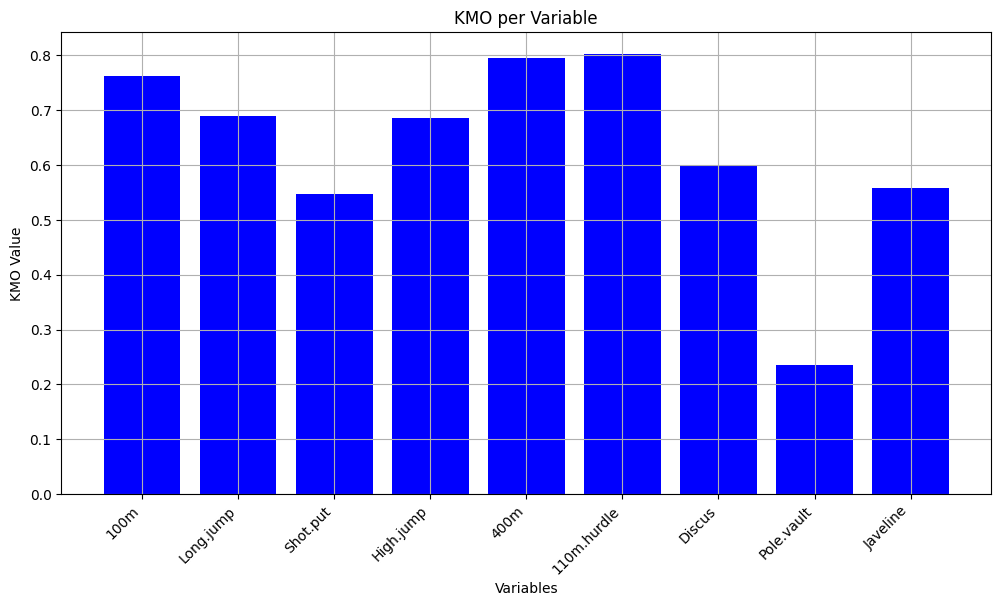

In [20]:
# Create a bar chart to visualize KMO per variable
plt.figure(figsize=(12, 6))
plt.bar(df_X_standardized.columns, kmo_score, color='blue')
plt.title('KMO per Variable')
plt.xlabel('Variables')
plt.ylabel('KMO Value')
plt.grid()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

### 6.2 Bartlett's Sphericity Test

In [21]:
# Calculate Bartlett's Sphericity Test
chi_square, p_value = calculate_bartlett_sphericity(X)

# Display the test statistics
print(f'Chi-Square Value: {chi_square}')
print(f'P-value: {p_value}')

Chi-Square Value: 108.08169465908888
P-value: 3.9321338037485035e-09


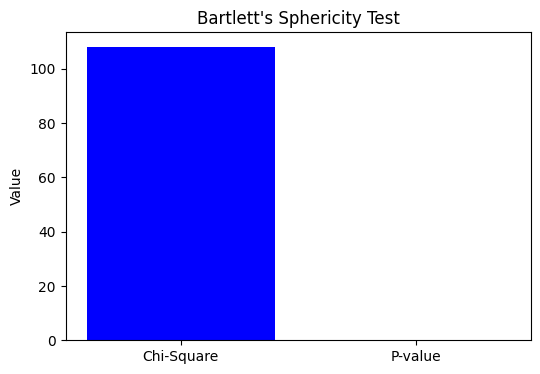

In [22]:
# Visualize Bartlett's Sphericity Test
plt.figure(figsize=(6, 4))
plt.bar(['Chi-Square', 'P-value'], [chi_square, p_value], color=['blue', 'green'])
plt.title("Bartlett's Sphericity Test")
plt.ylabel('Value')
plt.show()

## 7. PCA

In [23]:
X = np.asarray(X)

In [24]:
pca = PCA()
pca.fit(X)
autovalores = pca.explained_variance_
autovetores = pca.components_

## 7. Number of Factors

### 7.1 Kaiser's rule

In [25]:
# Create factor analysis object and fit it to your data
fa = FactorAnalyzer()
fa.fit(X)

# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

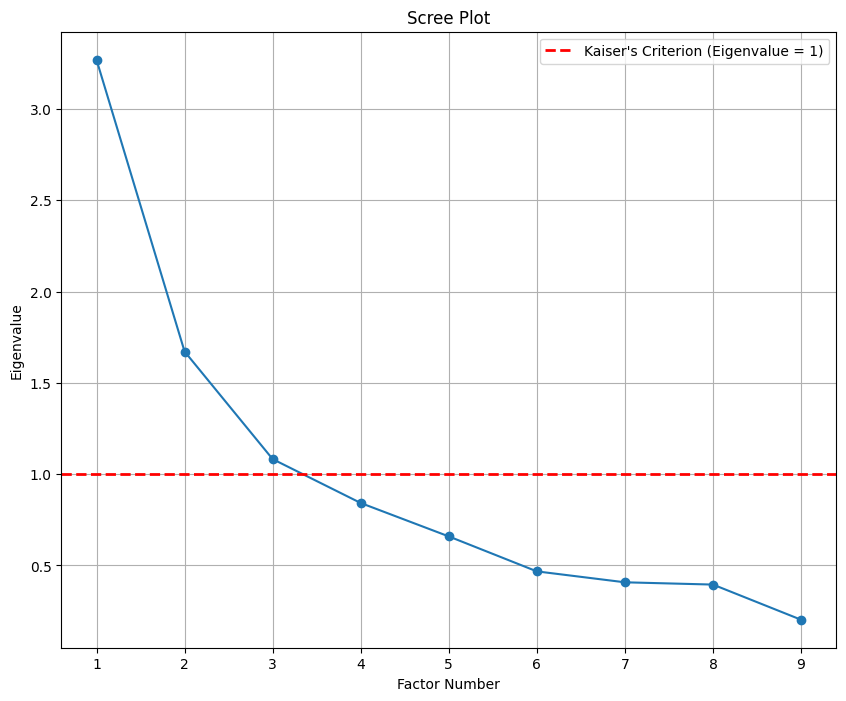

In [26]:
# Plot the eigenvalues against factor numbers
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title("Scree Plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.axhline(1, color='red', linestyle='dashed', linewidth=2, label="Kaiser's Criterion (Eigenvalue = 1)")
plt.legend()
plt.grid()
plt.show()

### 7.2 Analysis of Shared Variances

In [27]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

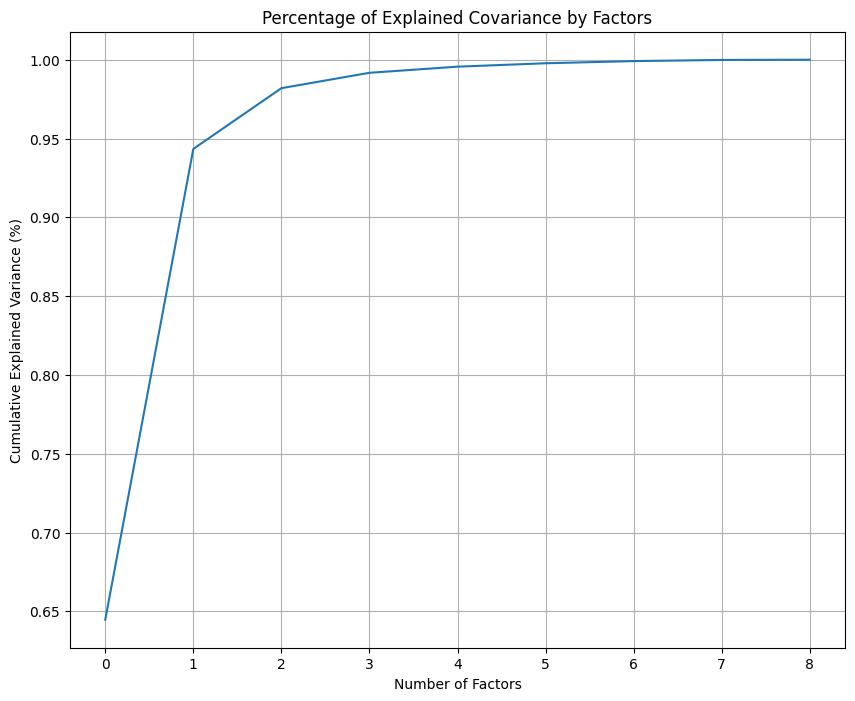

In [28]:
# Visualize the percentage of explained covariance
plt.figure(figsize=(10, 8))
# Plot the cumulative variance explained by each factor
plt.plot(exp_var_cumul )
plt.title('Percentage of Explained Covariance by Factors')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid()
plt.show()

In [29]:
model = PCA(n_components=2)
X_pca = model.fit(X)

In [31]:
components = model.fit_transform(X)
components 

array([[ 4.65528953, -1.59196422],
       [ 3.12393184,  5.77720022],
       [-6.79540083,  6.34236959],
       [ 3.59110832, -4.33213281],
       [ 5.44447578,  0.74959722],
       [-7.06442341, -1.6255546 ],
       [-2.659118  ,  1.88952028],
       [-1.93104161,  0.42223782],
       [-5.14957095,  4.42364431],
       [-0.97205763,  0.78122263],
       [-3.34613541, -1.5511795 ],
       [-2.34919248, -6.23037416],
       [-4.45106557, -3.175434  ],
       [12.97718332,  1.89664831],
       [12.39476677,  3.23351162],
       [-1.02220179,  8.04874659],
       [ 1.09161197,  4.0448924 ],
       [-2.9596262 ,  0.19239466],
       [ 5.33915633,  0.22182771],
       [-0.44087362,  0.58559679],
       [ 2.44378161, -2.85429279],
       [-2.84287764,  1.17941846],
       [-2.37918055, -1.43850954],
       [-4.63718376,  1.3749341 ],
       [ 2.54657918, -0.46884477],
       [ 6.21122599, -0.81137556],
       [ 4.17288453,  3.96713206],
       [-4.64343376, -3.44162477],
       [ 0.12527745,

In [32]:
for component in range(len(model.components_)):
    df[f'PC{component}'] = model.fit_transform(X)[:,component]

In [33]:
df.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PC0,PC1
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,4.655290,-1.591964
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,3.123932,5.777200
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,-6.795401,6.342370
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,3.591108,-4.332133
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,5.444476,0.749597


In [34]:
loadings = model.components_.T * np.sqrt(model.explained_variance_)

fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(columns_selected):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [35]:
X_reconstructed = model.inverse_transform(components)
X_reconstructed 

array([[10.97474627,  7.27810093, 14.63589674,  1.98200161, 49.67703998,
        14.66443304, 43.77240463,  4.76711978, 63.20194867],
       [10.87825406,  7.38493559, 15.46230692,  2.0402022 , 49.3172806 ,
        14.30855419, 50.55463117,  4.68889837, 60.09039224],
       [10.97091949,  7.29978906, 14.76103888,  2.00444383, 49.32826808,
        14.32274239, 49.00772225,  4.71059147, 50.30213576],
       [11.02730337,  7.22281899, 14.20116421,  1.95365666, 49.81724344,
        14.8036774 , 40.90598288,  4.80082108, 62.76739604],
       [10.93106156,  7.32419658, 14.99801345,  2.00573006, 49.5577047 ,
        14.54595295, 46.19650712,  4.73866051, 63.45619053],
       [11.09490191,  7.16594459, 13.71732638,  1.93361588, 49.7248344 ,
        14.71568298, 41.26851452,  4.80060648, 51.79124437],
       [10.99644525,  7.26581059, 14.51216456,  1.982452  , 49.53301638,
        14.52419486, 45.58667224,  4.74878554, 55.31062132],
       [11.01133789,  7.2485683 , 14.38062844,  1.97260008, 49

## 9. Obtaining the model to be implemented in the microcontroller

In [36]:
print(port(model))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class PCA {
                public:
                    /**
                    * Apply dimensionality reduction
                    * @warn Will override the source vector if no dest provided!
                    */
                    void transform(float *x, float *dest = NULL) {
                        static float u[2] = { 0 };
                        u[0] = dot(x,   -0.010208828727  , 0.009522664636  , 0.07801034572  , 0.004103495259  , -0.003935853874  , -0.004232033634  , 0.21088426957  , -0.00282519103  , 0.974263356619 );
                        u[1] = dot(x,   -0.015215508318  , 0.016476395215  , 0.128355383147  , 0.008750586985  , -0.049637455695  , -0.049172415055  , 0.964175225747  , -0.0112017847  , -0.219782142624 );
                        memcpy(dest != NULL ? dest : x, u, sizeof(float) * 2);
                    }

                protected:
                   

## 10. Saves the template in a .h file

In [37]:
with open('./PCA/PCA.h', 'w') as file:
    file.write(port(model))